# What Annotated Claims do we have?
## How many are true, false, what is the topic distribution, inter-annotator agreement?
Etc.

In [3]:
import pandas as pd
import numpy as np

np.random.seed(1234)
df = pd.read_csv('../RumourDatabase.csv', encoding='utf-8')
df.drop(['Unnamed: 0', 'Duplicate indexes (add the index of the first entry)', 'Idx', 'Unnamed: 8', 'Topics'], axis=1, inplace=True)
df_new = df.copy()
df_new.drop_duplicates(subset="Claim", keep=False, inplace=True)
df_new['Claim'] = df_new['Claim'].str.replace(r'[_\W\d]',' ')
df_new['Claim'] = df_new['Claim'].str.lower()
df_new['Category'] = df_new['Category'].fillna('Other')
df_new.reset_index(drop=True, inplace=True)

df_new.sample(5)

,Category,Claim,Debunk_Date,Label,Source
1247,"Public authority actions, policy, and communic...",japan has sent a man medical team to wuh...,2/4/2020,False,VERA Files
842,Claims about prominent actors,photo purportedly showing tom hanks holding a ...,3/13/2020,False,AFP
576,"Public authority actions, policy, and communic...",russia unleashed more than lions on its st...,3/24/2020,False,PolitiFact
1135,"Public authority actions, policy, and communic...",a large amount of sulfur dioxide was observed ...,2/15/2020,False,BuzzFeed Japan
227,"Vaccines, medical treatments, and tests",a post shared repeatedly on whatsapp and faceb...,3/30/2020,False,AFP


62 1341


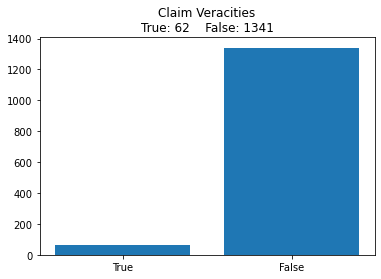

In [87]:
# How many true and how many false?

from matplotlib import pyplot as plt

true_count = len(df_new[df_new['Label'] == True])
false_count = len(df_new[df_new['Label'] == False])
print(true_count, false_count)
plt.title("Claim Veracities\nTrue: {}    False: {}".format(true_count, false_count))
plt.bar(["True", "False"], [true_count, false_count])
plt.show()

In [19]:
categories = set(df_new['Category'])
categories

{'Claims about prominent actors',
 'Community spread and impact',
 'Conspiracy theories',
 'Medical advice and self-treatments',
 'Other',
 'Public authority actions, policy, and communications',
 'Public preparedness, protests, and civil disobedience',
 'Vaccines, medical treatments, and tests',
 'Virus origin and properties',
 'Virus transmission'}

<ipython-input-90-4f38aa5853cf>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([key.replace(" ", "\n") for key in category_freqs.keys()])


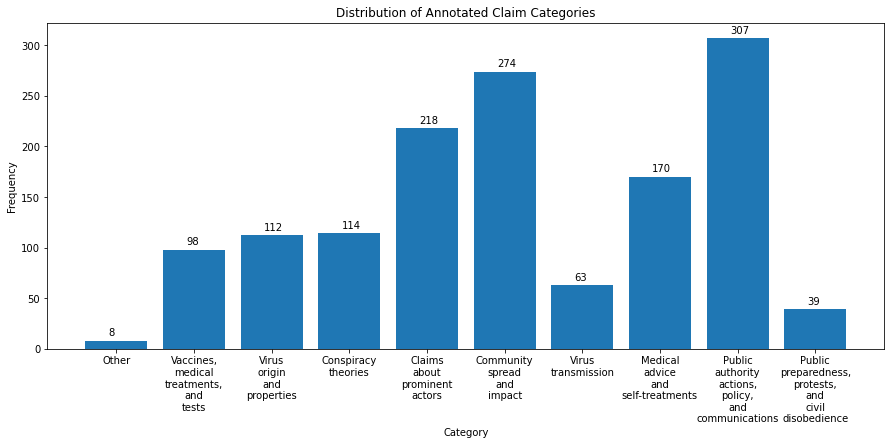

In [90]:
def sort_dict(dictionary, descending=True):
    """
    :param dictionary: of format {key: numerical value}
    :return: sorted list of (key, value) tuples
    """
    return sorted(list(dictionary.items()), key=lambda pair: pair[1], reverse=descending)


category_freqs = {}
for category in categories:
    category_freqs[category] = len(df_new[df_new['Category'] == category])

plt.figure(figsize=(15,6))
plt.title("Distribution of Annotated Claim Categories")
plt.bar(category_freqs.keys(), category_freqs.values())

plt.gca().set_xticklabels([key.replace(" ", "\n") for key in category_freqs.keys()])
for i, v in enumerate(category_freqs.values()):
    plt.gca().text(i - 0.1, v + 5, str(v))
    
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()